In [1]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

train_csv_1 = pd.read_csv('train_csv_1_imputed.csv')  
test_csv = pd.read_csv('merged_test.csv')          

X_train = train_csv_1.drop(columns=['Realornot'])  
y_train = train_csv_1['Realornot']  

X_test = test_csv.drop(columns=['Realornot'])  
y_test = test_csv['Realornot']  

# Crear i entrenar el model EBM
ebm_model = ExplainableBoostingClassifier(random_state=42)


In [2]:
ebm_model.fit(X_train, y_train)

# Predir les classes per al conjunt de test
y_test_pred = ebm_model.predict(X_test)



Exactitud del model en el conjunt de test: 0.75

Informe de classificació per al conjunt de test:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1172
           1       0.77      0.72      0.74      1200

    accuracy                           0.75      2372
   macro avg       0.75      0.75      0.75      2372
weighted avg       0.75      0.75      0.75      2372



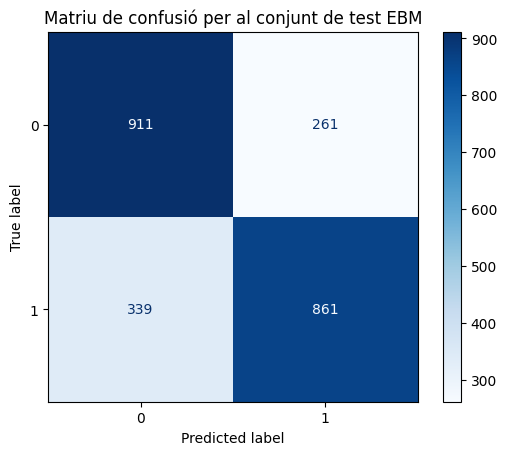

In [5]:

# Avaluar el rendiment del model sobre el conjunt de test
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nExactitud del model en el conjunt de test: {accuracy_test:.2f}")

# Informe de classificació
print("\nInforme de classificació per al conjunt de test:")
print(classification_report(y_test, y_test_pred))

# Matriu de confusió
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ebm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Matriu de confusió per al conjunt de test EBM")
plt.show()



In [4]:
# Explicacions globals del model
from interpret import show
ebm_global = ebm_model.explain_global()
show(ebm_global)


<!-- http://127.0.0.1:7001/2226981252240/ -->